# Azure Spending Analysis - Pie Chart Visualizations

This notebook visualizes your Azure spending data using pie charts for:
1. **Top 5 Service Categories** - Shows spending by service family
2. **Top 5 Subscriptions** - Shows spending by individual subscriptions

**Data Period**: 2024-2025
**Total Organization Spending**: ~$407.3M

In [1]:
# Import required libraries for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Set up plotting style
plt.style.use('ggplot')
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Top 5 Azure Subscriptions by Spending (2024-2025)
# Data from Azure Data Explorer query results
subscription_data = {
    'SubscriptionName': [
        'DME/DOCCLOUD ML PRD',
        'ATS/DPAAS DATAMART PRD', 
        'DMA/AEP-COMPUTE-079 PRD',
        'DMA/AEP-COMPUTE-001 PRD',
        'DMA/AEP-COMPUTE-017 PRD'
    ],
    'SubscriptionID': [
        'AZR9349',
        'AZR6665',
        'AZR2789', 
        'AZR2711',
        'AZR2727'
    ],
    'TotalCost': [
        17867814.991,  # $17.9M
        10379522.751,  # $10.4M
        8363445.057,   # $8.4M
        7359571.703,   # $7.4M
        5939999.372    # $5.9M
    ],
    'Percentage': [
        4.39,  # 4.39%
        2.55,  # 2.55%
        2.05,  # 2.05%
        1.81,  # 1.81%
        1.46   # 1.46%
    ],
    'PrimaryUse': [
        'AI/ML Services',
        'Data Storage',
        'Analytics & Compute',
        'Analytics & Compute', 
        'Analytics & Compute'
    ]
}

# Create DataFrame for subscriptions
sub_df = pd.DataFrame(subscription_data)
sub_df['FormattedCost'] = sub_df['TotalCost'].apply(lambda x: f"${x/1000000:.1f}M")
sub_df['CostInMillions'] = sub_df['TotalCost'] / 1000000
sub_df['DisplayName'] = sub_df['SubscriptionName'] + ' (' + sub_df['SubscriptionID'] + ')'

print("Top 5 Azure Subscriptions by Spending:")
print(sub_df[['DisplayName', 'FormattedCost', 'Percentage', 'PrimaryUse']].to_string(index=False))

Top 5 Azure Subscriptions by Spending:
                      DisplayName FormattedCost  Percentage          PrimaryUse
    DME/DOCCLOUD ML PRD (AZR9349)        $17.9M        4.39      AI/ML Services
 ATS/DPAAS DATAMART PRD (AZR6665)        $10.4M        2.55        Data Storage
DMA/AEP-COMPUTE-079 PRD (AZR2789)         $8.4M        2.05 Analytics & Compute
DMA/AEP-COMPUTE-001 PRD (AZR2711)         $7.4M        1.81 Analytics & Compute
DMA/AEP-COMPUTE-017 PRD (AZR2727)         $5.9M        1.46 Analytics & Compute


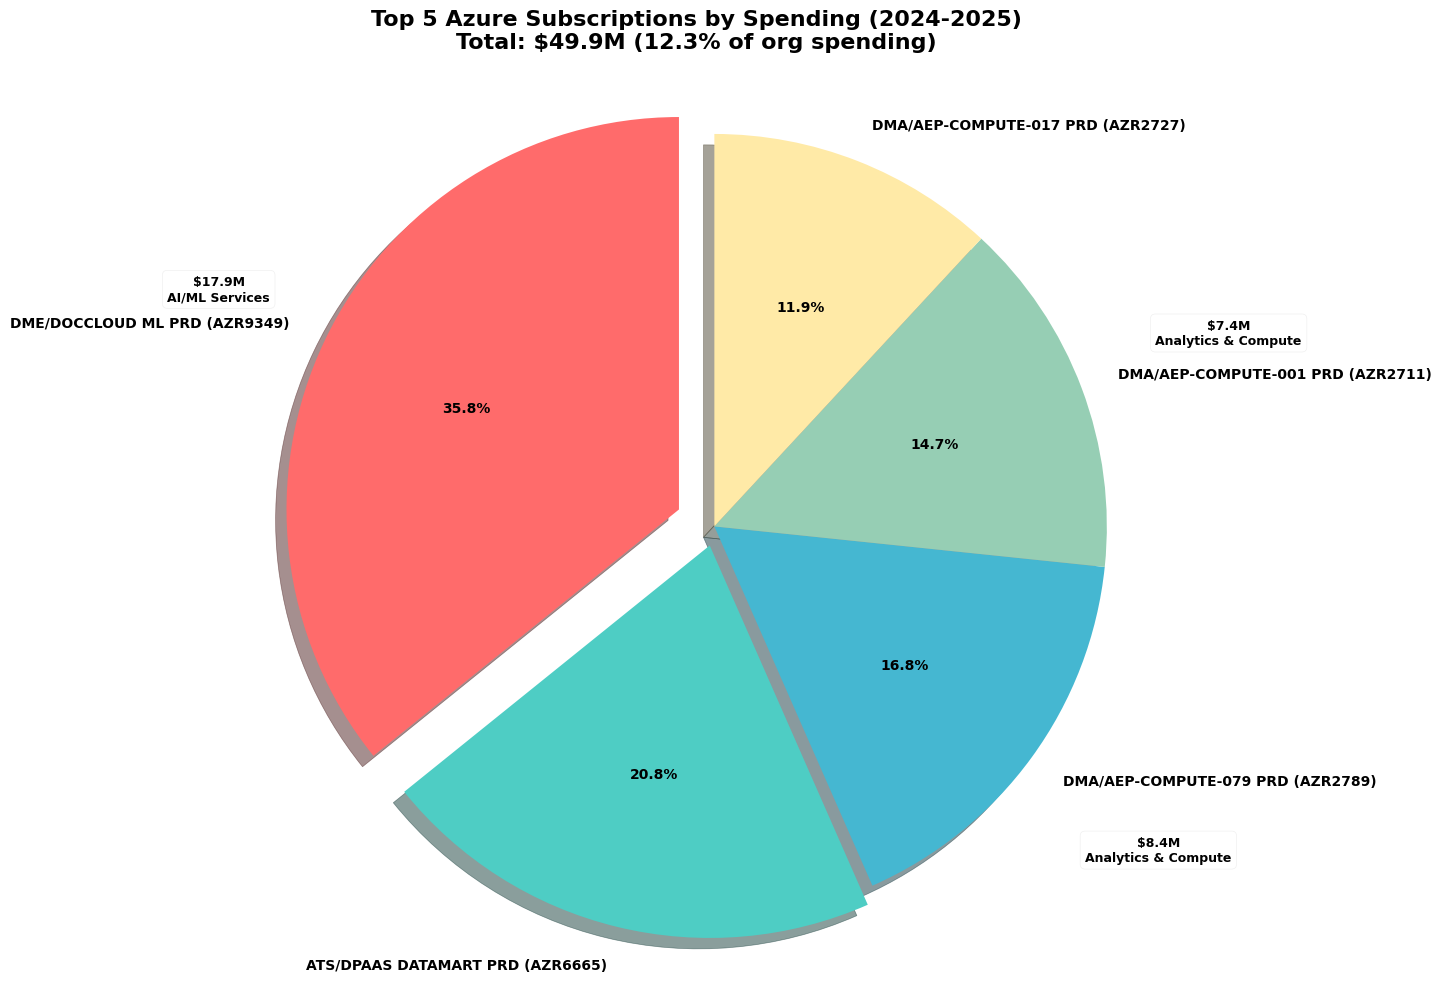

In [3]:
# Create a beautiful pie chart for subscription spending using matplotlib
plt.figure(figsize=(14, 10))

# Define colors for each subscription
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    sub_df['TotalCost'], 
    labels=sub_df['DisplayName'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.1, 0.05, 0, 0, 0),  # Explode the top 2 subscriptions
    shadow=True,
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Customize the chart
plt.title('Top 5 Azure Subscriptions by Spending (2024-2025)\nTotal: $49.9M (12.3% of org spending)', 
          fontsize=16, fontweight='bold', pad=20)

# Add cost values to the labels
for i, (wedge, text) in enumerate(zip(wedges, texts)):
    # Calculate the angle to position the cost label
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 1.4 * np.cos(np.radians(angle))
    y = 1.4 * np.sin(np.radians(angle))
    
    # Add cost label with primary use case
    plt.annotate(f'{sub_df.iloc[i]["FormattedCost"]}\n{sub_df.iloc[i]["PrimaryUse"]}', 
                xy=(x, y), 
                ha='center', va='center',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.9))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [4]:
# Create an interactive pie chart for subscription spending using Plotly
fig = px.pie(
    sub_df, 
    values='TotalCost', 
    names='DisplayName',
    title='Top 5 Azure Subscriptions by Spending (2024-2025)<br>Combined Total: $49.9M (12.3% of organization spending)',
    color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'],
    hole=0.4  # Creates a donut chart
)

# Update traces for better appearance
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>' +
                  'Amount: $%{value:,.0f}<br>' +
                  'Percentage: %{percent}<br>' +
                  'Primary Use: %{customdata}<br>' +
                  '<extra></extra>',
    customdata=sub_df['PrimaryUse'],
    textfont_size=11,
    marker=dict(line=dict(color='#FFFFFF', width=3))
)

# Update layout
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    height=700,
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.05,
        font=dict(size=12)
    )
)

# Add center annotation with total
fig.add_annotation(
    text=f"Top 5<br>Subscriptions<br><b>$49.9M</b><br>12.3%",
    x=0.5, y=0.5,
    font_size=16,
    font_color="black",
    showarrow=False
)

fig.show()

## 📊 Top 5 Azure Subscriptions Analysis

### Subscription Breakdown:

1. **🤖 DME/DOCCLOUD ML PRD (AZR9349)** - $17.9M (4.39%)
   - **Primary Focus**: AI/Machine Learning (99.99% of spending)
   - **Key Services**: OpenAI, cognitive services
   - **Purpose**: Document processing and ML workloads

2. **💾 ATS/DPAAS DATAMART PRD (AZR6665)** - $10.4M (2.55%)
   - **Primary Focus**: Data Storage (98.2% of spending)
   - **Key Services**: Azure Data Lake Storage Gen2
   - **Purpose**: Enterprise data mart and analytics platform

3. **📊 DMA/AEP-COMPUTE-079 PRD (AZR2789)** - $8.4M (2.05%)
   - **Primary Focus**: Analytics (61.6%) + Compute (36.6%)
   - **Key Services**: Azure Databricks, VMs
   - **Purpose**: Analytics processing and compute workloads

4. **🖥️ DMA/AEP-COMPUTE-001 PRD (AZR2711)** - $7.4M (1.81%)
   - **Primary Focus**: Analytics (51.2%) + Compute (45.8%)
   - **Key Services**: Azure Databricks, Virtual Machines
   - **Purpose**: Primary analytics and compute environment

5. **⚡ DMA/AEP-COMPUTE-017 PRD (AZR2727)** - $5.9M (1.46%)
   - **Primary Focus**: Analytics (45.8%) + Compute (42.0%) + Networking (9.9%)
   - **Key Services**: Databricks, VMs, networking
   - **Purpose**: Distributed analytics with high networking requirements

### Key Insights:

- **Specialized vs. General Purpose**: DME subscription is highly specialized (99.99% AI/ML), while DMA subscriptions are more balanced
- **Data Strategy**: ATS subscription serves as the central data storage hub
- **Compute Distribution**: Multiple DMA subscriptions suggest distributed analytics workloads
- **Top 5 Impact**: These 5 subscriptions represent 12.3% of total organizational spending ($49.9M out of $407.3M)